<a href="https://colab.research.google.com/github/chikakoto/facial-expression-recognition/blob/rabi/notebooks/rabiuls_notebook/RH_DataProcessing_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Source 
https://www.kaggle.com/datasets/msambare/fer2013
https://drive.google.com/file/d/168XK2dmyPg9d6AI3cgbxhCXdIow7uVK-/view?usp=sharing 


Downloading data from Google drive 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
%matplotlib inline

In [ ]:
from google.colab.patches import cv2_imshow
from skimage.transform import resize
from skimage.io import imread

In [ ]:
#download the csv file from google drive
#https://drive.google.com/file/d/1o8mCsWr1h7YsllifIakD6NthrnB43l_S/view?usp=sharing
!gdown --id 1o8mCsWr1h7YsllifIakD6NthrnB43l_S -O data.csv

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1o8mCsWr1h7YsllifIakD6NthrnB43l_S
To: /content/data.csv
100% 60.3M/60.3M [00:00<00:00, 94.9MB/s]


In [ ]:
#mounting google drive and navigating to project folder
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Colab Notebooks/facial-expression-recognition

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition


In [ ]:
#create a dataframe using the data csv
df = pd.read_csv('/content/data.csv')
print(df.columns)
print(df.shape)
df.head(2)

Index(['Unnamed: 0', 'file', 'emotion', 'pixels'], dtype='object')
(7178, 4)


,Unnamed: 0,file,emotion,pixels
0,0,PrivateTest_45699463.jpg,3,5 4 5 9 10 9 10 12 8 14 13 17 24 26 36 48 67 7...
1,1,PrivateTest_61855708.jpg,3,19 21 22 18 20 21 16 18 19 18 20 23 23 14 16 1...


In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)
print(df.columns)
df.head(2)

Index(['file', 'emotion', 'pixels'], dtype='object')


,file,emotion,pixels
0,PrivateTest_45699463.jpg,3,5 4 5 9 10 9 10 12 8 14 13 17 24 26 36 48 67 7...
1,PrivateTest_61855708.jpg,3,19 21 22 18 20 21 16 18 19 18 20 23 23 14 16 1...


In [ ]:
df.tail()

,file,emotion,pixels
7173,PrivateTest_79683471.jpg,1,2 2 1 1 1 1 1 2 0 4 2 1 3 3 0 16 91 155 187 19...
7174,PrivateTest_34013087.jpg,1,97 105 106 105 101 101 109 111 110 107 113 109...
7175,PublicTest_67559665.jpg,1,46 42 46 41 43 55 76 83 80 85 95 106 115 120 1...
7176,PrivateTest_89077668.jpg,1,22 26 19 14 29 30 52 112 143 160 169 170 173 1...
7177,PrivateTest_53395751.jpg,1,218 107 78 80 56 55 63 69 78 87 100 116 145 15...


In [ ]:
np.array(df.pixels[0].split(' ')).astype('float32').reshape(48,48)

array([[ 5.,  4.,  5., ..., 12.,  3.,  8.],
       [ 3.,  5.,  7., ..., 10.,  8.,  8.],
       [ 2.,  6.,  8., ...,  3.,  8.,  5.],
       ...,
       [ 8.,  8., 10., ..., 13., 16., 13.],
       [11.,  7.,  8., ..., 19., 16.,  8.],
       [15.,  7., 10., ..., 17., 13., 11.]], dtype=float32)

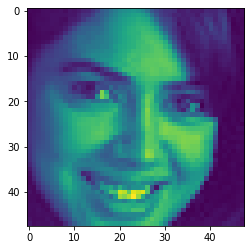

In [ ]:
plt.imshow(np.array(df.pixels[0].split(' ')).astype('float32').reshape(48,48))

In [ ]:
df['pixels']= df['pixels'].apply(lambda x: np.array(x.split(' ')).astype('float32').reshape(48,48))

In [ ]:
df['pixels'][0].shape

(48, 48)

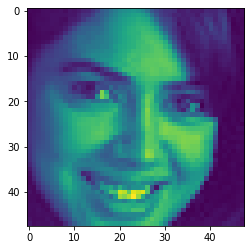

In [ ]:
plt.imshow(df['pixels'][0])

In [ ]:
df.head()

,file,emotion,pixels
0,PrivateTest_45699463.jpg,3,"[[5.0, 4.0, 5.0, 9.0, 10.0, 9.0, 10.0, 12.0, 8..."
1,PrivateTest_61855708.jpg,3,"[[19.0, 21.0, 22.0, 18.0, 20.0, 21.0, 16.0, 18..."
2,PublicTest_53681781.jpg,3,"[[228.0, 229.0, 230.0, 229.0, 228.0, 227.0, 22..."
3,PrivateTest_52109800.jpg,3,"[[25.0, 33.0, 43.0, 30.0, 46.0, 84.0, 105.0, 1..."
4,PublicTest_41104919.jpg,3,"[[33.0, 29.0, 15.0, 15.0, 20.0, 36.0, 40.0, 54..."


In [ ]:
# df['lables'] = df.file.apply(lambda x: x.split('_')[0])
df['lables'] = df.file.apply(lambda x: 1 if 'Test' in x else 0)
df['lables'].value_counts()

1    7178
Name: lables, dtype: int64

In [ ]:
# pip install opencv-python==3.4.3.18
import cv2

In [ ]:
gray = df['pixels'][0]

In [ ]:
gray.shape

(48, 48)

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')


In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

error: ignored

In [ ]:
# import numpy as np
# import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

     |████████████████████████████████| 25.0 MB 64.8 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

error: ignored

In [ ]:
from google.colab.patches import cv2

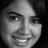

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(gray)

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = sorted(df.emotion.value_counts().index), y = df.emotion.value_counts())

In [ ]:
from skimage.io import imread
import numpy as np
import matplotlib.image as img
import pandas as pd

emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}
train_data = []
train_dir = '/content/train'
for dirname, dirs, filenames in os.walk(train_dir, topdown=True):
    cat = dirname.replace(train_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
          file = os.path.join(dirname, filename)
          obj = mpimg.imread(os.path.join(dirname, filename)).flatten()
          # obj = imread(os.path.join(dirname, filename)).flatten()
          print(type(obj), len(obj), obj.shape)
          #train_data.append((emotions[cat], obj, file))
          train_data.append((1,obj))
          break


<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)


In [ ]:
df = pd.DataFrame(train_data)
df.shape

(7, 2)

In [ ]:
df.head(1)

,0,1
0,1,"[255, 254, 255, 232, 115, 102, 80, 62, 50, 53,..."


In [ ]:
len(df[1][0])

2304

In [ ]:
df.to_csv('gfgfile.csv',
              header = ['l','p'],
              index = None)

In [ ]:
df.to_csv('gfgfile.csv',
              header = None,
              index = None)

In [ ]:
df1 = pd.read_csv('/content/text')

In [ ]:
len(df1.head(1).split(' '))

AttributeError: ignored

In [ ]:
from skimage.io import imread
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}
train_data = []
train_dir = '/content/train'
for dirname, dirs, filenames in os.walk(train_dir, topdown=True):
    cat = dirname.replace(train_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
          file = os.path.join(dirname, filename)
          # obj = mpimg.imread(os.path.join(dirname, filename)).flatten()
          obj = imread(os.path.join(dirname, filename)).flatten()
          print(type(obj), len(obj), obj.shape)
          train_data.append((emotions[cat], obj, file))
          break


<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)


In [ ]:
train_data[0]

(5,
 array([255, 254, 255, ..., 127, 179, 191], dtype=uint8),
 '/content/train/surprise/Training_98972491.jpg')

In [ ]:
for x,y,z in train_data:
  print(len(y))
  print(len(str(y)))


2304
29
2304
29
2304
29
2304
29
2304
29
2304
29
2304
23


In [ ]:
df1 = pd.read_csv('/content/a_file.txt')
df1.head()

,(5,array([255,254,255,...,127,179,191],dtype=uint8),'/content/train/surprise/Training_98972491.jpg')
0,(6,array([201,201,203,...,97,92,91],dtype=uint8),'/content/train/neutral/Training_9443885.jpg')
1,(2,array([111,127,155,...,236,230,213],dtype=uint8),'/content/train/fear/Training_77272441.jpg')
2,(1,array([ 59,40,59,...,165,163,163],dtype=uint8),'/content/train/disgust/Training_33936842.jpg')
3,(0,array([150,171,199,...,101,103,101],dtype=uint8),'/content/train/angry/Training_58517344.jpg')
4,(4,array([147,151,144,...,0,1,0],dtype=uint8),'/content/train/sad/Training_7410773.jpg')


In [ ]:
df1[1]

KeyError: ignored

In [ ]:
a_list = ["abc", "def", "ghi"]
textfile = open("a_file.txt", "w")
for element in a_list:
    textfile.write(element + "\n")
textfile.close()

In [ ]:
type(train_data[0])

list

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head(2)

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...


In [ ]:
print('len of trian data list:', len(train_data),len(train_label))
print('len of one pixel:', len(train_data[0]))
import pandas as pd
#converting out test data into a Dataframe 
df = pd.DataFrame(list(zip(train_label, train_data)),
               columns =['emotion','pixels'])

df.to_csv('file_name1.txt', index=None, sep='\t', mode='a')
df1 = pd.read_csv('/content/file_name1.txt')
print(len(df1.pixels[0]))
df1.head()

len of trian data list: 7 0
len of one pixel: 2304
29


,emotion,pixels,dir
0,5,[255 254 255 ... 127 179 191],/content/train/surprise/Training_98972491.jpg
1,6,[201 201 203 ... 97 92 91],/content/train/neutral/Training_9443885.jpg
2,2,[111 127 155 ... 236 230 213],/content/train/fear/Training_77272441.jpg
3,1,[ 59 40 59 ... 165 163 163],/content/train/disgust/Training_33936842.jpg
4,0,[150 171 199 ... 101 103 101],/content/train/angry/Training_58517344.jpg


In [ ]:
print('len of trian data list:', len(train_data))
print('len of one pixel:', len(train_data[1][1]))
import pandas as pd
#converting out test data into a Dataframe 
df = pd.DataFrame(train_data, columns = ['emotion','pixels','dir'])

len of trian data list: 7
len of one pixel: 2304


In [ ]:
df.to_csv('file_name1.txt', index=None, sep='\t', mode='a')
df1 = pd.read_csv('/content/file_name1.txt')
print(len(df1.pixels[0]))
df1.head()

29


,emotion,pixels,dir
0,5,[255 254 255 ... 127 179 191],/content/train/surprise/Training_98972491.jpg
1,6,[201 201 203 ... 97 92 91],/content/train/neutral/Training_9443885.jpg
2,2,[111 127 155 ... 236 230 213],/content/train/fear/Training_77272441.jpg
3,1,[ 59 40 59 ... 165 163 163],/content/train/disgust/Training_33936842.jpg
4,0,[150 171 199 ... 101 103 101],/content/train/angry/Training_58517344.jpg


In [ ]:
len(df1.pixels[0])

29

In [ ]:
#Extracting the data and saving it into list
#need to improve code with how we are extracting "cat"
from zipfile import ZipFile
import matplotlib.image as mpimg
import os
train_data = []
train_dir = '/content/train'
# test_dir = '/content/test'
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}
with ZipFile('/content/archive.zip', 'r') as f:
  f.extractall()

for dirname, dirs, filenames in os.walk(train_dir, topdown=True):
    cat = dirname.replace(train_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
          file = os.path.join(dirname, filename)
          obj = mpimg.imread(os.path.join(dirname, filename)).flatten()
          train_data.append((emotions[cat], obj, file))

In [ ]:
print('len of trian data list:', len(train_data))
print('len of one pixel:', len(train_data[1][1]))
import pandas as pd
#converting out test data into a Dataframe 
df = pd.DataFrame(train_data, columns = ['emotion','pixels','dir'])

len of trian data list: 7
len of one pixel: 2304


In [ ]:
print('shape of the traning dataframe: ', df.shape)
print('data type of the pixel: ', type(df.pixels[0]))

shape of the traning dataframe:  (7, 3)
data type of the pixel:  <class 'numpy.ndarray'>


In [ ]:
df.head(2)

,emotion,pixels,dir
0,5,"[255, 254, 255, 232, 115, 102, 80, 62, 50, 53,...",/content/train/surprise/Training_98972491.jpg
1,6,"[201, 201, 203, 198, 202, 207, 215, 212, 217, ...",/content/train/neutral/Training_9443885.jpg


In [ ]:
df.pixels[0]
print(len(df.pixels[0]))

2304


In [ ]:
train_img = df.pixels.apply(lambda x: x.reshape(48,48,1))

In [ ]:
df['pixels']

0    [255, 254, 255, 232, 115, 102, 80, 62, 50, 53,...
1    [201, 201, 203, 198, 202, 207, 215, 212, 217, ...
2    [111, 127, 155, 180, 189, 197, 191, 131, 75, 8...
3    [59, 40, 59, 63, 29, 26, 30, 24, 35, 64, 86, 9...
4    [150, 171, 199, 201, 138, 31, 49, 65, 77, 88, ...
5    [147, 151, 144, 153, 154, 155, 164, 164, 164, ...
6    [59, 60, 39, 27, 24, 51, 26, 10, 23, 20, 21, 3...
Name: pixels, dtype: object

In [ ]:
df.pixels[0].reshape(48,48)

array([[248, 247, 173, ..., 158, 160, 168],
       [253, 249, 186, ..., 159, 163, 161],
       [254, 254, 184, ..., 153, 157, 172],
       ...,
       [ 36,  42,  92, ...,   2,   0,   0],
       [ 42,  72, 139, ...,   0,   0,   1],
       [ 50, 127, 137, ...,   1,   1,   0]], dtype=uint8)

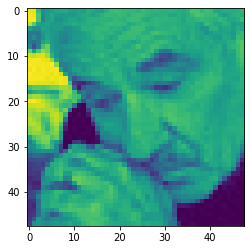

In [ ]:
#lets look at one image 
plt.imshow(df.pixels[0].reshape(48,48))

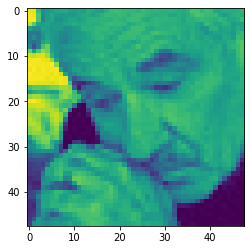

In [ ]:
#view an imapge directly from image file 
plt.imshow(mpimg.imread(df.dir[0]))

In [ ]:
emotions_label_text = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}

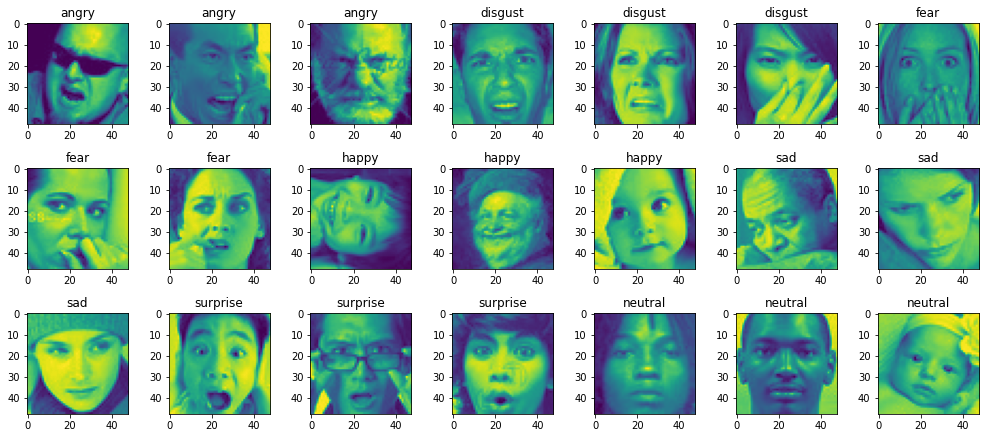

In [ ]:
fig = plt.figure(1,(14,14))
x = 0

for label in sorted(df.emotion.unique()):
  for i in range(3):
    img = df[df.emotion == label].pixels.iloc[x]
    img = img.reshape(48,48)
    x +=1

    ax = plt.subplot(7,7,x)
    ax.imshow(img)
    ax.set_title(emotions_label_text[label])
    plt.tight_layout()

# Importing Library


## Importing Basic Python Library

# Data & data visualization

## Importing Data

## Viz

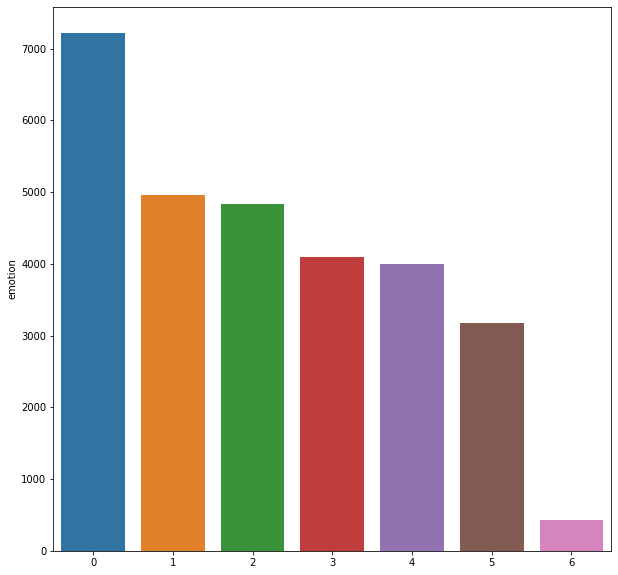

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = sorted(df.emotion.value_counts().index), y = df.emotion.value_counts())

In [ ]:
train_img = df.pixels.apply(lambda x: x.reshape(48,48,1))

In [ ]:
X = np.stack(train_img, axis=0)
y = df.emotion.values

In [ ]:
print('shape of our image array: ', X.shape)
print('shape of our labels array: ', y.shape)
# plt.imshow(X[0])
# plt.title(emotions_label_text[y[0]])

shape of our image array:  (28709, 48, 48, 1)
shape of our labels array:  (28709,)


In [ ]:
print(X[0].shape)
X[0]

(48, 48, 1)


array([[[248],
        [247],
        [173],
        ...,
        [158],
        [160],
        [168]],

       [[253],
        [249],
        [186],
        ...,
        [159],
        [163],
        [161]],

       [[254],
        [254],
        [184],
        ...,
        [153],
        [157],
        [172]],

       ...,

       [[ 36],
        [ 42],
        [ 92],
        ...,
        [  2],
        [  0],
        [  0]],

       [[ 42],
        [ 72],
        [139],
        ...,
        [  0],
        [  0],
        [  1]],

       [[ 50],
        [127],
        [137],
        ...,
        [  1],
        [  1],
        [  0]]], dtype=uint8)

In [ ]:
print(y.shape)
y

(28709,)


array([4, 4, 4, ..., 3, 3, 3])

In [ ]:
#one hot encoding the label data 
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [ ]:
print(y.shape)
y

(28709, 7)


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
#spliting data into test and train 
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)

In [ ]:
X_train.shape, X_Test.shape, y_train.shape, y_Test.shape

((25838, 48, 48, 1), (2871, 48, 48, 1), (25838, 7), (2871, 7))

In [ ]:
# image pre-processing
X_train = X_train/255
X_Test  = X_Test/255

In [ ]:
# Generate Training and Validation Batches
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("/content/train",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("/content/test",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
pip install livelossplot 

     |████████████████████████████████| 793 kB 7.0 MB/s 
     |████████████████████████████████| 381 kB 27.3 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.33.0 which is incompatible.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot.tf_keras import PlotLossesCallback
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.8.0


In [ ]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 128)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


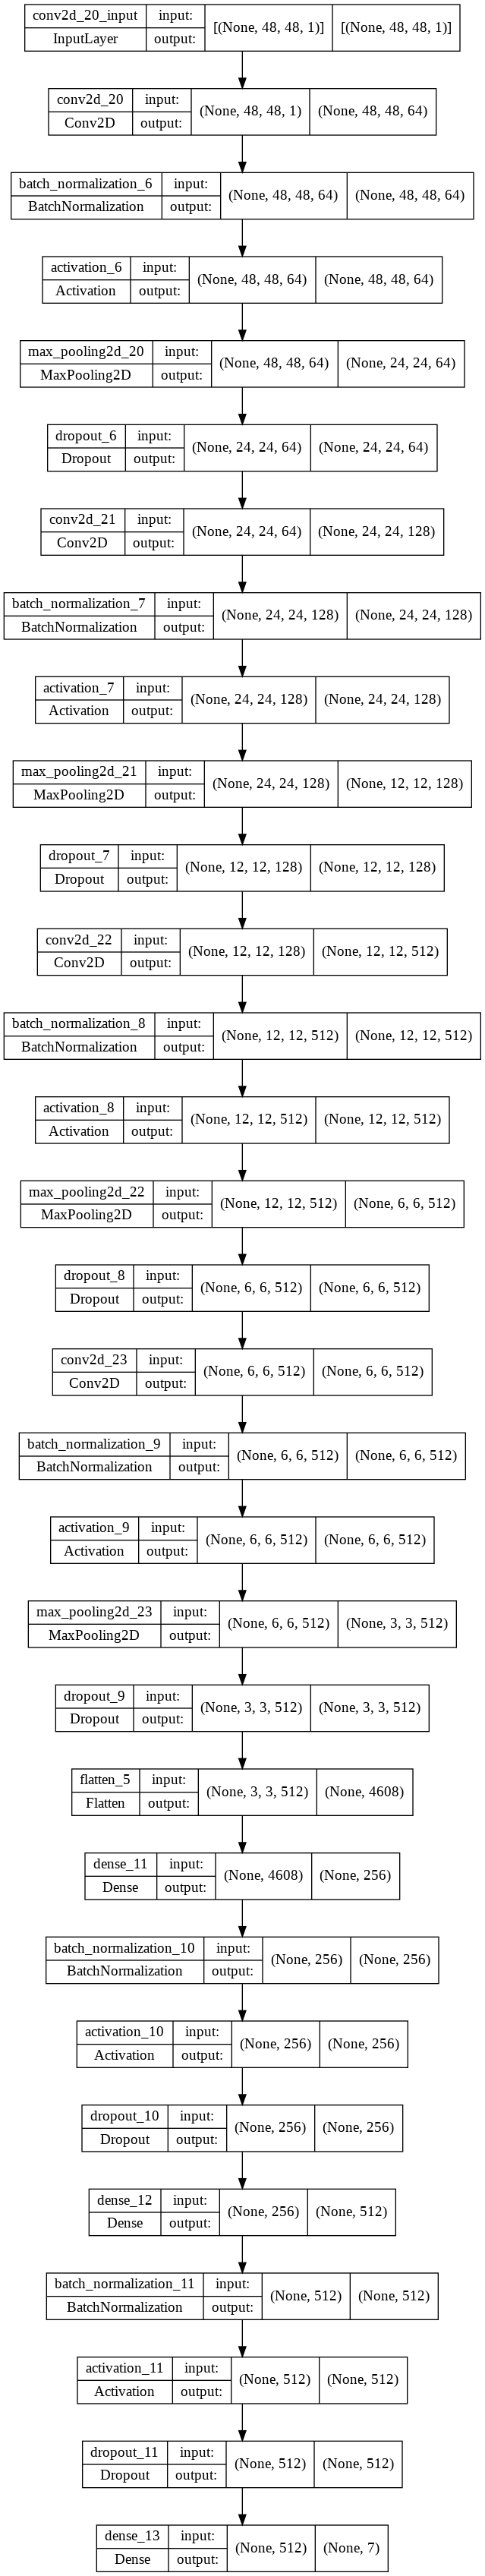

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=400, height=200)

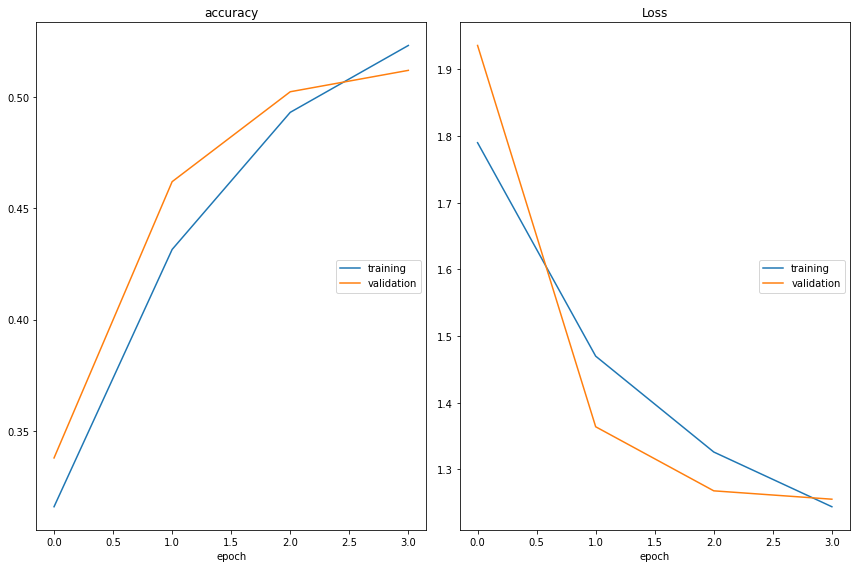

accuracy
	training         	 (min:    0.316, max:    0.523, cur:    0.523)
	validation       	 (min:    0.338, max:    0.512, cur:    0.512)
Loss
	training         	 (min:    1.244, max:    1.790, cur:    1.244)
	validation       	 (min:    1.255, max:    1.936, cur:    1.255)

Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 1490s 3s/step - loss: 1.2441 - accuracy: 0.5233 - val_loss: 1.2554 - val_accuracy: 0.5121 - lr: 5.0000e-04
Epoch 5/15
156/448 [=========>....................] - ETA: 15:23 - loss: 1.1832 - accuracy: 0.5493

In [ ]:
%%time

epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

# PayGroud Start

In [ ]:
tf_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(1000,activation='relu'),
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [ ]:
tf_model.summary()

In [ ]:
tf_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.0001),
                 loss = "sparse_categorical_crossentropy",
                 metrics = ['accuracy']
)

In [ ]:
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [ ]:
input_shape = (48, 48, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

# ML Model's 

## Scores

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Accuracy: 99.91%


In [ ]:
obj

array([[ 59,  60,  39, ...,  72, 112, 196],
       [ 63,  49,  43, ...,  69,  97, 169],
       [ 63,  44,  36, ...,  72,  81, 137],
       ...,
       [ 20,  14,  12, ...,  54,  56,  44],
       [ 21,  16,  14, ...,  56,  55,  46],
       [ 19,  20,  10, ...,  55,  61,  40]], dtype=uint8)

In [ ]:
arr = np.array((1, 2, 3, 4, 5))

print(arr)

[1 2 3 4 5]


In [ ]:
len(np.array2string(obj))

191